In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
#그래프 패키지 
import matplotlib.pyplot as plt 
%matplotlib inline 

In [3]:
# 동시 출력
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [4]:
# 한글 문제 해결
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')# 한글 문제 해결
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

## 사이킷런을 이용하여 붓꽃(Iris) 데이터 품종 예측하기

#### 사이킷런을 이용한 붓꽃 데이터 분류
- 붓꽃 데이터 세트를 사용해서
- 붓꽃의 품종을 분류 (Classification)

#### 붓꽃 데이터 세트
- sklearn.datasets에 들어 있음
- load_iris()를 통해 로드해서 사용
- 머신러닝 각 분야에서 알고리즘을 측정하기 위한 기본 자료로 다양하게 활용
- 4가지 속성(피처)을 가진 3가지 붓꽃 품종의 50개 샘플 포함

#### 3가지 붓꽃 품종
- Setosa
- Versicolor
- Virginica


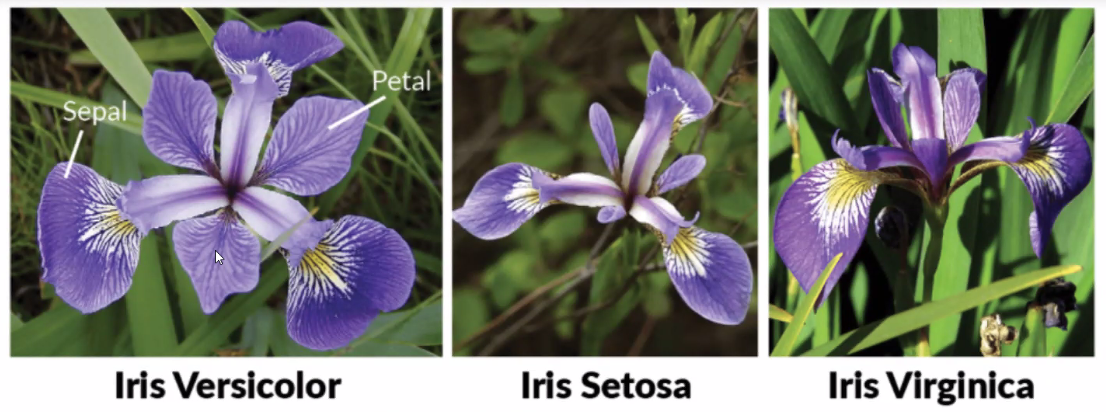

#### 붓꽃의 4가지 속성(피처 (Feature))
- 꽃받침 길이 : Sepal Length
- 꽃받침 너비 : Sepal Width
- 꽃잎의 길이 : Petal Length
- 꽃잎의 너비 : Petal Width


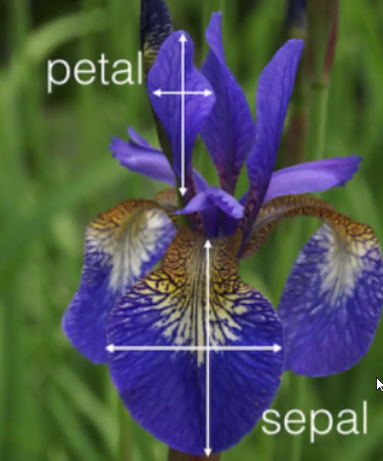

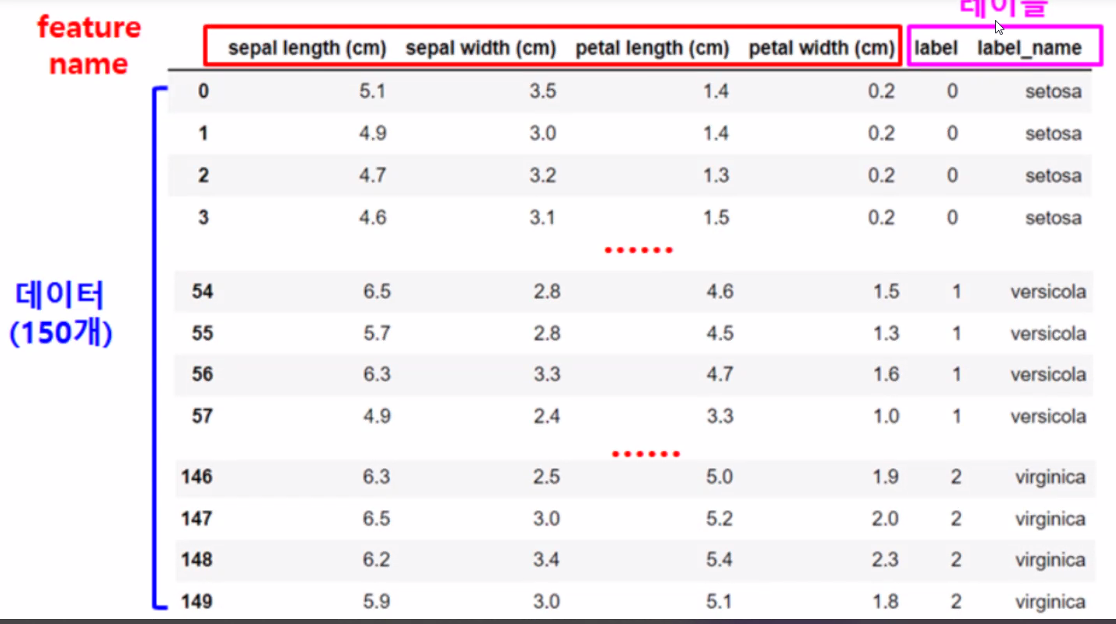

### 분류(Classification)
- 대표적인 지도 학습 방법
- 학습을 위한 다양한 피처와 분류 결정값인 레이블(품종) 데이터로 모델을 학습한 후
- 테스트 데이터의 데이터를 보고 어떤 품종인지 예측하는 것

#### 용어 정리

#### 피처(Feature) : 데이터 세트 속성
- feature_names : sepal length, sepal with, petal length, petal width
    
#### 레이블(label) :
- 품종 (setosa, versicolor, virginica)
- 학습 : 결정값(주어진 정답)
- 테스트 : 타깃값(target)(예측해야 할 값)
- target(숫자) : 0, 1, 2
- target_names : setosa, versicolor, virginica
- 레이블 = 결정값 = 타겟값


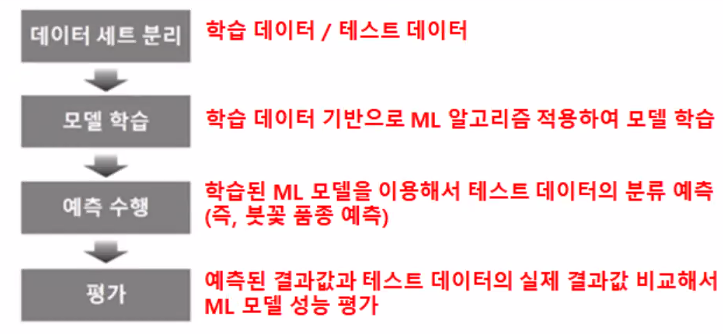

### 사이키럿을 통한 모델 구성 및 학습

In [5]:
# 사이킷런 버전 확인
import sklearn
print(sklearn.__version__)

0.24.1


**사이킷러 필요 모듈 로딩**

In [7]:
from sklearn.datasets import load_iris  
from sklearn.tree import DecisionTreeClassifier  
from sklearn.model_selection import train_test_split

#### 사이킷런 패키지 모듈

- 명명규칙 : 모듈명은 sklearn 으로 시작
- sklearn.datasets : 사이킷런에서 자체적으로 제공하는 데이터 세트를 생성하는 모듈 모임
- sklearn.tree : 트리 기반 ML 알고리즘을 구현한 클래스 모임
- sklearn.model_selection : 학습 데이터와 검증 데이터, 예측 데이터로 데이터를 분리하거나 최적의 하이퍼 파라미터로 평가하기 위한 다양한 모듈의 모임
    - 하이퍼 파라미터 : 머신러닝 알고리즘별로 최적의 학습을 위해 직접 입력하는 파라미터 (튜닝)
    - 머신러닝 알고리즘의 성능 튜닝에 사용


#### 데이터 세트 로딩

In [23]:
# 붓꽃 데이터 세트 로딩
iris = load_iris()
iris
# feature_names : sepal length, sepal with, petal length, petal width
# iris.data : Iris 데이터 세트에서 
# 피처(feature)만으로 된 데이터를 numpy로 가지고 있음
iris_data = iris.data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [14]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [16]:
# 레이블(결정값) 데이터를 numpy arr로 저장되어 있음
# iris.target
iris_label = iris.target
print('iris target값:', iris_label)
print('iris target명:', iris.target_names)


iris target값: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
iris target명: ['setosa' 'versicolor' 'virginica']


In [20]:
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [22]:
iris_df['label'] = iris.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


train_test_split() 함수 사용

* train_test_split(iris_data, iris_label, test_size=0.3, random_state=11)
* train_test_split(피처 데이터 세트, 레이블 데이터 세트, 테스트 데이터 세트 비율, 난수 발생값)
* test_size : 전체 데이터 세트 중 테스트 데이터 세트 비율(0.3)
* random_state : 수행할때 마다 동일한 데이터 세트로 분리하기 위해 시드값 고정(실습용)

train_test_split() 반환값
* X_train : 학습용 피처 데이터 세트  (feature)
* X_test : 테스트용 피처 데이터 세트  (feature)
* y_train : 학습용 레이블 데이터 세트 (target)
* y_test : 테스트용 레이블 데이터 세트 (target)

* feature : 대문자 X_
* label(target) : 소문자 y_


In [26]:
# 학습 데이터와 테스트 데이터 세트로 분리(iris_data, iris_label) => 8:2로 분리

#학습 데이터와 테스트 데이터 세트로 분리
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_label, 
                                                    test_size=0.2, random_state=11)


#### ML 알고리즘으로 의사결정 트리 알고리즘을 이용해서 학습과 예측 수행  
- DecisionTreeClassifier 클래스의 fit()/predict() 메소드 사용  
- fit() : 학습 수행 (학습용 데이터)
    - fit(학습용 피처 데이터, 학습용 레이블(정답) 데이터)
- predict() : 예측 수행
    - predict(테스트용 피처 데이터)


In [28]:
# DecisionTreeClassifier 객체 인스턴스 생성
dt_clf = DecisionTreeClassifier(random_state=11)

# 학습 수행
dt_clf.fit(X_train, y_train) # 학습용 피처 데이터, 학습용 레이블(정답) 데이터

DecisionTreeClassifier(random_state=11)

#### 테스터 데이터 세트로 예측 (Predict) 수행

In [30]:
pred = dt_clf.predict(X_test)
pred

array([2, 2, 1, 1, 2, 0, 1, 0, 0, 1, 1, 1, 1, 2, 2, 0, 2, 1, 2, 2, 1, 0,
       0, 1, 0, 0, 2, 1, 0, 1])

In [31]:
y_test

array([2, 2, 2, 1, 2, 0, 1, 0, 0, 1, 2, 1, 1, 2, 2, 0, 2, 1, 2, 2, 1, 0,
       0, 1, 0, 0, 2, 1, 0, 1])

In [32]:
# 실제 테스트 데이터 레이블 값과 예측한 값 비교
print(pred)
print(y_test)
# 30개 중 2개만 틀렸고 28개 정확하게 예측


[2 2 1 1 2 0 1 0 0 1 1 1 1 2 2 0 2 1 2 2 1 0 0 1 0 0 2 1 0 1]
[2 2 2 1 2 0 1 0 0 1 2 1 1 2 2 0 2 1 2 2 1 0 0 1 0 0 2 1 0 1]


### 예측 정확도 평가 (p92)
#### 예측 결과를 기반으로  
- 의사 결정 트리 기반의 DecisionTreeClassifier의 예측 성능 평가  
- 머신러닝 모델의 여러 성능 평가 방법 중 정확도 측정  
    - 정확도 : 예측 결과 실제 레이블 값과 얼마나 정확하게 맞는지 평가하는 지표  
    - 예측한 붓꽃 품종과 실제 테스트 데이터 세트의 붓꽃 품종이 얼마나 일치하는지 확인  
    - 정확도 측정을 위해 사이킷런에서 제공하는 accuracy_score() 함수 사용  
- accuracy_score(실제 테스트용 레이블 데이터 세트, 예측된 레이블 데이터 세트)


In [33]:
## 데이터 정확도 확인
from sklearn.metrics import accuracy_score
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))


예측 정확도: 0.9333


###### 붓꽃 데이터 품종 예측 프로세스 정리 #####
0. 데이터 준비 (데이터 로드 / 데이터 확인) : load_iris() 함수 사용  
1. 학습 데이터와 테스트 데이터 세트로 분리 : train_test_split() 함수 사용  
2. 학습 수행 : DecisionTreeClassifier 클래스의 fit()/predict() 메소드 사용  
        fit() : 학습용 데이터 사용  
        predict() : 테스트용 피처 데이터 사용  
3. 예측 정확도 평가 () : accuracy_score() 함수 사용  
    - 실제 테스트용 레이블 데이터 세트와 예측된 레이블 데이터 세트 비교해서   
    - 예측 정확도 측정
